In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im

In [82]:
video = cv2.VideoCapture("images/30s.mp4")
roi = cv2.imread('images/roi.jpg', 0)
low_yellow = np.array([18, 110,  150])
up_yellow = np.array([48, 255, 255])

def apply_roi(img, roi):
    h, w = roi.shape
    for r in range(h):
        for c in range(w):
            img[r][c] = 0 if roi[r][c] == 0 else img[r][c]
    return img




In [83]:
ret, frame = video.read()

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

yellow_mask = cv2.inRange(hsv, low_yellow, up_yellow)
white_mask = cv2.inRange(gray, 150, 255)

mask = apply_roi(yellow_mask + white_mask, roi)

In [84]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [85]:
edges = cv2.Canny(mask, 50, 100)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    frame = cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255))

cv2.imshow('mask', mask)
cv2.imshow('edges', edges)
cv2.imshow('line', frame)

TypeError: 'NoneType' object is not iterable

In [41]:
h, w, _ = frame.shape
roi = np.zeros((1080, 1920))
mid1 = (760, 540)
mid2 = (1140, 540)
left = (0, 810)
right = (1600, 1080)

roi = cv2.line(roi, left, mid1, 1, 1)
roi = cv2.line(roi, mid1, mid2, 1, 1)
roi = cv2.line(roi, mid2, right, 1, 1)

for c in range(1600):
    for r in range(h-1, 0, -1):
        if roi[r][c] == 1:
            break
        roi[r][c] = 1

roi = np.int8(roi)

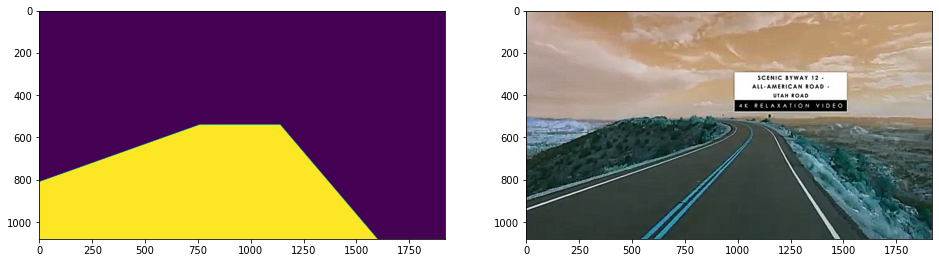

In [45]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
plt.imshow(roi)
plt.subplot(1, 2, 2)
plt.imshow(frame)
plt.show()

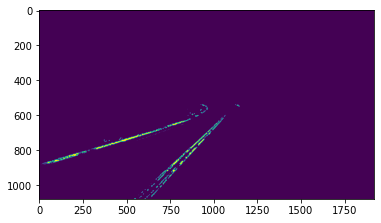

In [46]:
low_yellow = np.array([23, 41, 133])
up_yellow = np.array([40, 150, 255])
blur = cv2.GaussianBlur(frame, (3,3), 1, 1)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
hls = cv2.cvtColor(frame, cv2.COLOR_BGR2HLS)
mask  = cv2.inRange(hsv, low_yellow, up_yellow)  * roi
plt.imshow(mask)

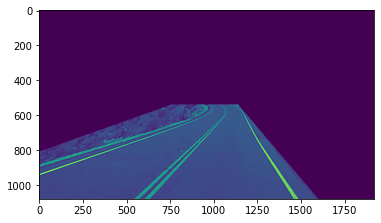

In [47]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mask = gray * roi
plt.imshow(mask)

In [52]:
mask.min()

0

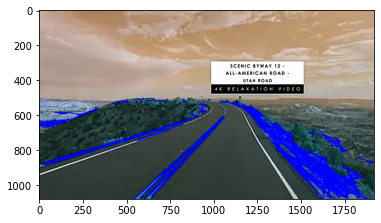

In [34]:
mask = np.uint8(mask)
edges = cv2.Canny(mask, 50, 100)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=50)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 3)
plt.imshow(mask)
plt.imshow(frame)

In [53]:
video = cv2.VideoCapture("images/30s.mp4")

h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))

roi = np.zeros((h, w))
mid1 = (w*4//10, h//2)
mid2 = (w*6//10, h//2)
left = (0, h*3//4)
right = (w*5//6, h)

roi = cv2.line(roi, left, mid1, 1, 1)
roi = cv2.line(roi, mid1, mid2, 1, 1)
roi = cv2.line(roi, mid2, right, 1, 1)

for c in range(w*5//6):
    for r in range(h-1, 0, -1):
        if roi[r][c] == 1:
            break
        roi[r][c] = 1

roi = np.int8(roi)

ret, frame = video.read()

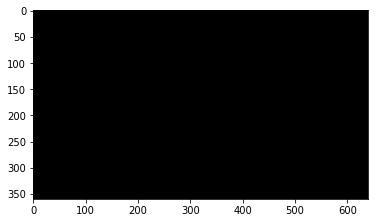

In [54]:
plt.imshow(frame)
plt.show()

In [66]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
mask = np.multiply(gray, roi)
mask = np.int32(mask)

In [99]:
video = cv2.VideoCapture("images/30s.mp4")

h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))

print(w, h)

roi = np.zeros((h, w))
mid1 = (w*4//10, h*3//5)
mid2 = (w*6//10, h*3//5)
left = (0, h*3//4)
right = (w*5//6, h)
print(left, mid1, mid2, right)

roi = cv2.line(roi, left, mid1, 1, 1)
roi = cv2.line(roi, mid1, mid2, 1, 1)
roi = cv2.line(roi, mid2, right, 1, 1)

for c in range(w*5//6):
    for r in range(h-1, 0, -1):
        if roi[r][c] == 1:
            break
        roi[r][c] = 1
roi = np.int32(roi * 255)

cv2.imwrite('images/roi.jpg', roi)
# plt.imshow(roi)
roi

640 360
(0, 270) (256, 216) (384, 216) (533, 360)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]])